# INTERNSHIP HACKATHON


## Loading data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data=pd.read_csv("data.csv")
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [ ]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


## Data Analysis and Cleaning

In [ ]:
#let's check if we got some null values or not
data.isnull().sum()

input     1
output    1
dtype: int64

In [ ]:
#looks like we got some null values  so we remove them
data.dropna(axis=0, inplace=True)

In [ ]:
data.isnull().sum()

input     0
output    0
dtype: int64

## Visualisation of data

<AxesSubplot:ylabel='output'>

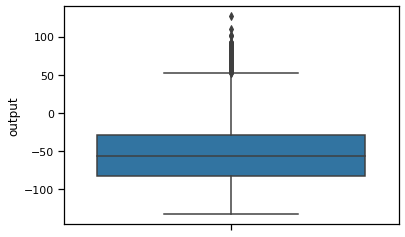

In [ ]:
import seaborn as sns
sns.boxplot(y = data['output'])

<AxesSubplot:>

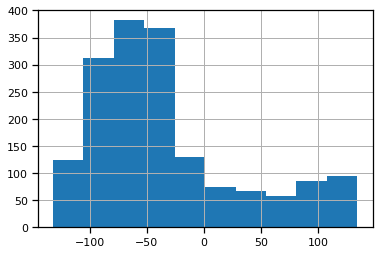

In [ ]:
data.output.hist()

# NOW LETS REMOVE OUTLIERS 

In [ ]:
q1 = data['output'].quantile(0.25)
q3 = data['output'].quantile(0.75)
iqr = q3 - q1

In [ ]:
upper = np.where(data['output'] >=(q3 + 1.5*iqr))
data.drop( upper[0] , inplace = True)

In [ ]:
data.shape

(1552, 2)

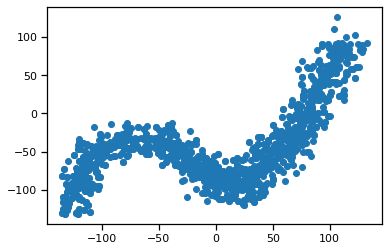

In [ ]:
plt.scatter(data['input'],data['output'])

## Normal Linear Regression model with standard scaler

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [ ]:
y_col = "output"
X = data.drop(y_col, axis=1)
y = data[y_col]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
X_test_s = s.transform(X_test)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

0.3598605224509025

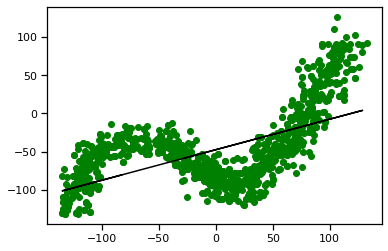

In [ ]:
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test.values, lr_pred,color='k')

the prediction line isnt that good !!! lets do some feature engineering stuff



## Linear Regression with Feature Engineering using Polynomial (Polynomial Regression)

[Text(0.5, 0, 'xdata'), Text(0, 0.5, 'ydata')]

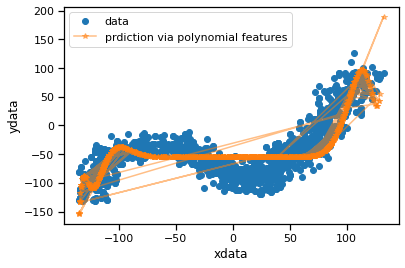

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=20)
lr=LinearRegression()
x_data=data[['input']]
y_data=data['output']
x_poly=pf.fit_transform(x_data)
lr=lr.fit(x_poly,y_data)
y_pred=lr.predict(x_poly)
x_data = np.array(x_data)
plt.plot(x_data,y_data,ls="",marker='o',label='data',alpha=1)
plt.plot(x_data,y_pred,marker='*',label='prdiction via polynomial features',alpha=0.5)
plt.legend()
ax=plt.gca()
ax.set(xlabel='xdata',ylabel='ydata')

In [ ]:
print(r2_score(y_data, y_pred))

0.5884945448026107


## Linear Regression with Feature Engineering using Polynomial (Polynomial Regression) and using standard scaler


In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=20, include_bias=True)
x_train_trans = poly.fit_transform(X_train_s)
x_test_trans = poly.transform(X_test_s)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8401819536291445


 ***We got the r2_score of 84% compared to 58% with no standard scaling using polynomial regression and 35% using linear regression before***

## Other models like Ridge Regression and Ridge CV

In [ ]:
y_col = "output"
X = data.drop(y_col, axis=1)
y = data[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)
from sklearn.linear_model import Ridge, RidgeCV, Lasso
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.1)

ridgeReg.fit(X_train_s,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train_s, y_train)
test_score_ridge = ridgeReg.score(X_test_s, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.3509193702319031
The test score for ridge model is 0.35986214654757953


## Hyper parameter tuning in RidgeCV

In [ ]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_s, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train_s, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test_s, y_test)))

The train score for ridge model is 0.3509190762123744
The train score for ridge model is 0.3598764582979973
